In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [64]:
df=pd.read_csv('AB_NYC_2019.csv')

In [65]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [67]:
df.shape

(48895, 16)

In [68]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [69]:
mv=df.isnull().sum()

In [70]:
mv

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [71]:
df.drop('last_review',axis=1,inplace=True)

In [72]:
mv=df.isnull().sum()

In [73]:
mv

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [74]:
df['reviews_per_month']=df['reviews_per_month'].fillna(0)

In [75]:
mv=df.isnull().sum()

In [76]:
mv

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [77]:
 df.shape

(48895, 15)

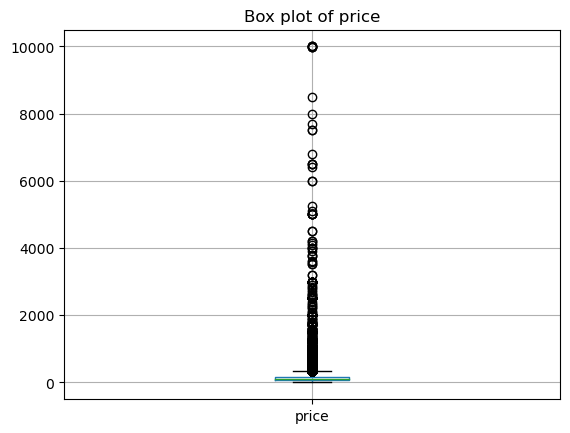

In [78]:
df.boxplot(column='price')
plt.title('Box plot of price')
plt.show()

In [79]:
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)


In [80]:
q1

69.0

In [81]:
q3

175.0

In [82]:
iqr=q3-q1
iqr

106.0

In [83]:
low_limit=q1-(1.5*iqr)
upper_limit=q3+(1.5*iqr)

In [84]:
low_limit

-90.0

In [85]:
upper_limit

334.0

In [86]:
df_new= df[(df['price']>low_limit) & (df['price']<upper_limit)]

In [87]:
df_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45918 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45918 non-null  int64  
 1   name                            45903 non-null  object 
 2   host_id                         45918 non-null  int64  
 3   host_name                       45897 non-null  object 
 4   neighbourhood_group             45918 non-null  object 
 5   neighbourhood                   45918 non-null  object 
 6   latitude                        45918 non-null  float64
 7   longitude                       45918 non-null  float64
 8   room_type                       45918 non-null  object 
 9   price                           45918 non-null  int64  
 10  minimum_nights                  45918 non-null  int64  
 11  number_of_reviews               45918 non-null  int64  
 12  reviews_per_month               

In [88]:
df_new.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.591800e+04,4.591800e+04,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000
mean,1.889785e+07,6.632478e+07,40.728487,-73.950728,119.947014,6.935973,23.944945,1.107847,6.620193,109.359358
std,1.091889e+07,7.756044e+07,0.055334,0.046471,68.117249,19.857728,45.317122,1.612711,30.938400,130.272996
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.436114e+06,7.722615e+06,40.689230,-73.981920,65.000000,1.000000,1.000000,0.050000,1.000000,0.000000
50%,1.952542e+07,3.028359e+07,40.721770,-73.954360,100.000000,2.000000,5.000000,0.380000,1.000000,39.000000
75%,2.891184e+07,1.054798e+08,40.763390,-73.934310,159.000000,5.000000,24.000000,1.620000,2.000000,216.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,333.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


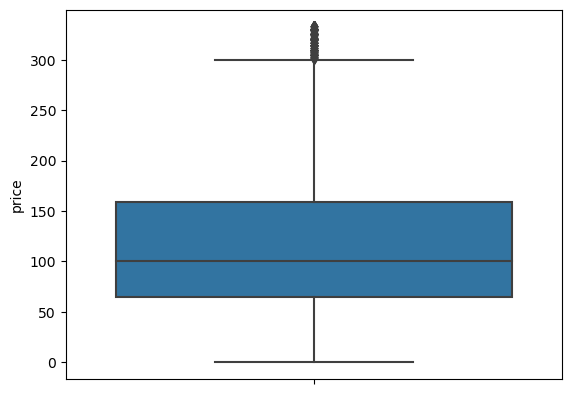

In [89]:
sns.boxplot(y='price', data=df_new)
plt.show()

In [90]:
#df_new[df['name'].isnull()]
#some name and host name mismatching will identify using id in case of mismatch

In [91]:
df_new.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.591800e+04,4.591800e+04,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000
mean,1.889785e+07,6.632478e+07,40.728487,-73.950728,119.947014,6.935973,23.944945,1.107847,6.620193,109.359358
std,1.091889e+07,7.756044e+07,0.055334,0.046471,68.117249,19.857728,45.317122,1.612711,30.938400,130.272996
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.436114e+06,7.722615e+06,40.689230,-73.981920,65.000000,1.000000,1.000000,0.050000,1.000000,0.000000
50%,1.952542e+07,3.028359e+07,40.721770,-73.954360,100.000000,2.000000,5.000000,0.380000,1.000000,39.000000
75%,2.891184e+07,1.054798e+08,40.763390,-73.934310,159.000000,5.000000,24.000000,1.620000,2.000000,216.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,333.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


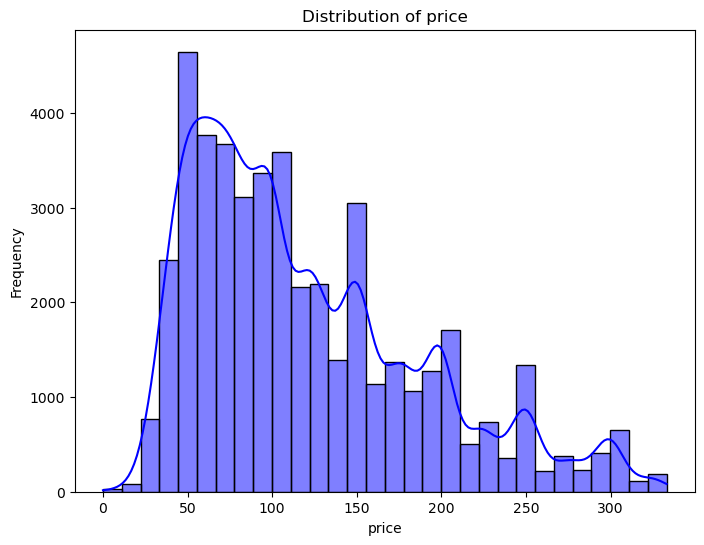

In [92]:
plt.figure(figsize=(8, 6)) # Optional: Adjust figure size
sns.histplot(data=df_new, x='price', bins=30, kde=True, color='blue')

# Add titles and labels for clarity
plt.title('Distribution of price')
plt.xlabel('price')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [93]:
# distribution of prices are skewed to the right hence 'Median' is a better measure of central tendency 
# mean price is 119.95 while median price is 100

In [94]:
df_new

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


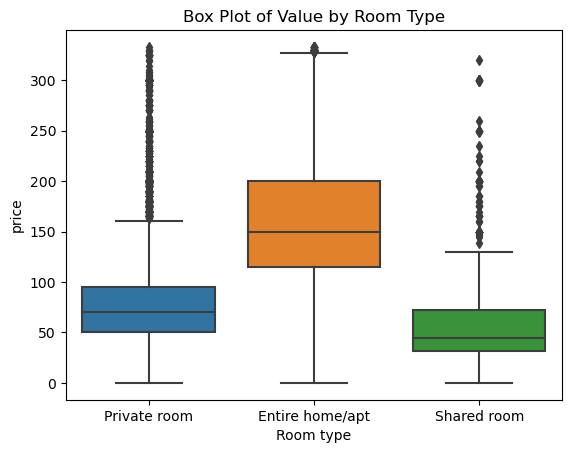

In [95]:
sns.boxplot(x='room_type', y='price', data=df_new)
plt.title('Box Plot of Value by Room Type')
plt.xlabel('Room type')
plt.ylabel('price')
plt.show()

In [96]:
#typical prices for entire home/apt rooms are highest and shared ones are the lowest genrally.

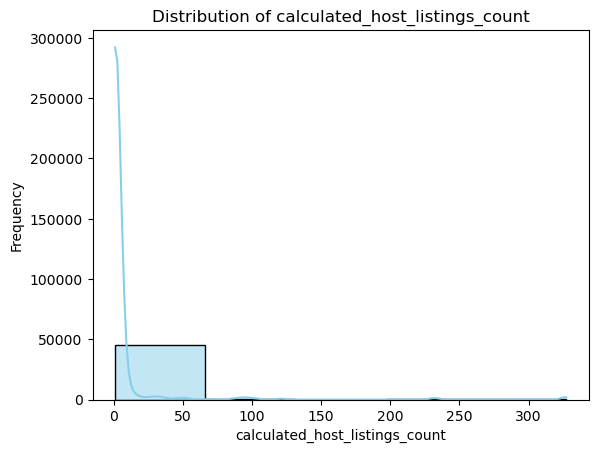

In [97]:
#plt.figure(figsize=(8, 6)) # Optional: Adjust figure size
sns.histplot(data=df_new, x='calculated_host_listings_count', bins=5, kde=True, color='skyblue')

# Add titles and labels for clarity
plt.title('Distribution of calculated_host_listings_count')
plt.xlabel('calculated_host_listings_count')
plt.ylabel('Frequency')


# Display the plot
plt.show()

In [98]:
df_new['calculated_host_listings_count'].mean()

6.620192517095692

In [99]:
# population mean of 'calculated_host_istings_count'= 6.62

In [100]:
df_new['calculated_host_listings_count'].median()

1.0

In [101]:
i=1
sample_means=[]
for i in range(1,1001):
    
    random_sample=df_new['calculated_host_listings_count'].sample(n=50,replace=True).mean()
    
    sample_means.append(random_sample)
    i=i+1

In [102]:
sample_means

[5.52,
 5.04,
 18.42,
 4.46,
 13.84,
 13.16,
 6.7,
 3.46,
 4.76,
 1.34,
 15.02,
 4.18,
 10.24,
 3.84,
 5.14,
 4.7,
 2.96,
 1.4,
 9.74,
 8.78,
 6.32,
 3.46,
 5.46,
 3.46,
 3.94,
 9.24,
 14.02,
 1.78,
 3.72,
 9.52,
 3.7,
 1.96,
 1.72,
 3.4,
 13.64,
 9.92,
 2.9,
 4.64,
 18.14,
 1.86,
 5.78,
 10.34,
 5.18,
 1.8,
 4.26,
 1.78,
 3.72,
 2.46,
 3.48,
 2.8,
 5.44,
 4.68,
 2.22,
 4.1,
 6.52,
 8.46,
 3.08,
 8.96,
 4.94,
 10.1,
 4.98,
 7.94,
 2.9,
 7.68,
 7.44,
 3.76,
 7.92,
 3.92,
 8.24,
 3.56,
 6.08,
 2.36,
 14.06,
 7.84,
 3.84,
 4.04,
 18.98,
 2.64,
 4.88,
 7.32,
 8.86,
 2.28,
 3.72,
 2.76,
 1.52,
 3.38,
 2.88,
 3.68,
 11.66,
 2.44,
 2.14,
 4.16,
 3.96,
 6.36,
 10.32,
 8.68,
 1.86,
 6.68,
 8.44,
 9.04,
 17.88,
 8.1,
 5.94,
 1.32,
 8.76,
 15.46,
 9.6,
 6.14,
 1.8,
 6.0,
 6.38,
 8.56,
 8.48,
 7.44,
 13.26,
 8.02,
 14.02,
 15.78,
 2.76,
 6.32,
 4.56,
 8.66,
 2.16,
 2.1,
 3.94,
 3.88,
 4.68,
 3.38,
 6.4,
 8.86,
 5.3,
 4.76,
 13.58,
 9.06,
 12.3,
 3.28,
 3.1,
 9.72,
 2.02,
 4.12,
 1.74,
 3.1,
 2.7,


In [103]:
len(sample_means)

1000

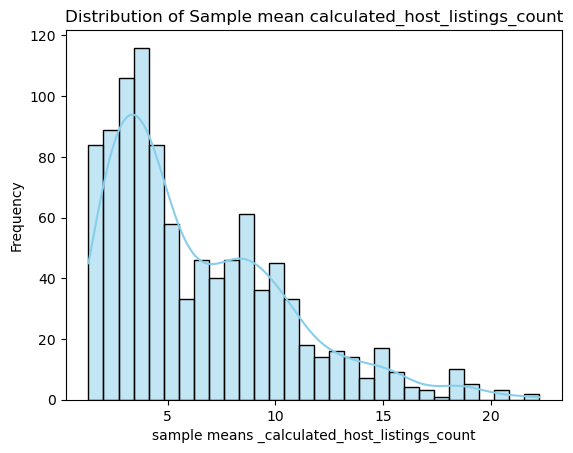

In [111]:
sns.histplot(sample_means, bins=30, kde=True, color='skyblue')

# Add titles and labels for clarity
plt.title('Distribution of Sample mean calculated_host_listings_count')
plt.xlabel('sample means _calculated_host_listings_count')
plt.ylabel('Frequency')


# Display the plot
plt.show()

In [105]:
Mean_sample_means=np.average(sample_means)

In [106]:
Mean_sample_means

6.39592

In [107]:
# mean of sample means 'calculated_host_istings_count'= 6.752 and it is very close to the population mean ie. 6.62 and 
#distribution of sample means is approximately normal 


Hypothetical Question: Is there a significant difference in the average price of Airbnb listings between Manhattan and Brooklyn?

 Hypotheses:
 null hypothesis (H0​) :  there is no difference in the average price between the two boroughs.
 
 alternative hypothesis (Ha​): there is a difference.


In [118]:
manhattan=df_new[df_new['neighbourhood_group']=='Manhattan']

In [119]:
manhattan

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,0.00,1,176
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,0.00,1,31
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [120]:
brooklyn=df_new[df_new['neighbourhood_group']=='Brooklyn']

In [121]:
brooklyn


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,1.34,3,314
15,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,1.20,1,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48882,36482231,Bushwick _ Myrtle-Wyckoff,66058896,Luisa,Brooklyn,Bushwick,40.69652,-73.91079,Private room,40,20,0,0.00,1,31
48884,36482783,Brooklyn Oasis in the heart of Williamsburg,274307600,Jonathan,Brooklyn,Williamsburg,40.71790,-73.96238,Private room,190,7,0,0.00,1,341
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,0.00,3,365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9


In [122]:
price_manhattan=manhattan['price']
price_brooklyn=brooklyn['price']

In [124]:
from scipy import stats

In [125]:
result = stats.ttest_ind(price_manhattan,price_brooklyn)
print(result.statistic)

60.2140401909329


In [126]:
print(result.pvalue)

0.0


alpha =0.05

In [127]:
if result.pvalue < 0.05:
    print("\nReject the null hypothesis. The means are significantly different.")
else:
    print("\nFail to reject the null hypothesis. The means are not significantly different.")


Reject the null hypothesis. The means are significantly different.


Problem 5 :

In [131]:
bronx=df_new[(df_new['neighbourhood_group']=='Bronx')& (df_new['price']<100 )& (df_new['number_of_reviews']>10)]

In [132]:
bronx

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
171,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2.04,3,353
207,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,1.45,3,323
433,149777,Artsy 1 bedroom Apt. 20 min to 42nd Grand Cent...,716306,"Dee, Dre & Mama Shelley",Bronx,Woodlawn,40.89747,-73.86390,Entire home/apt,77,1,197,2.49,1,309
484,169306,Affordable & Cozy,806214,Vanessa,Bronx,University Heights,40.85811,-73.90675,Private room,37,4,117,1.21,1,232
557,206071,Yankee Stadium Oasis 2 stops to Manhattan!,12221,Lori,Bronx,Concourse Village,40.82802,-73.92039,Private room,50,3,258,2.70,2,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42958,33363084,E community that is commercially (Website hidd...,242175033,Alex,Bronx,Allerton,40.86003,-73.86584,Entire home/apt,60,1,28,8.32,1,74
43839,33907325,TW #5 Private Rm - 1st Fl. Queen Bed 1 to 2 Gu...,211136294,Sharon & Erika,Bronx,Schuylerville,40.83715,-73.83489,Private room,60,1,20,7.59,5,343
44762,34392044,Lovely and affordable place in the Bronx,178924110,Roukayatou,Bronx,Hunts Point,40.81258,-73.88566,Private room,40,1,11,5.08,2,121
44873,34444744,Large Private room queen bed near kitchen,147762665,Jose,Bronx,Wakefield,40.88649,-73.85889,Private room,37,1,12,6.21,3,315


In [137]:
filtered_by_query = df_new.query(
    'neighbourhood_group == "Bronx" and price < 100 and number_of_reviews > 10'
)

print("\nSelection using df.query():")
filtered_by_query


Selection using df.query():


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
171,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2.04,3,353
207,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,1.45,3,323
433,149777,Artsy 1 bedroom Apt. 20 min to 42nd Grand Cent...,716306,"Dee, Dre & Mama Shelley",Bronx,Woodlawn,40.89747,-73.86390,Entire home/apt,77,1,197,2.49,1,309
484,169306,Affordable & Cozy,806214,Vanessa,Bronx,University Heights,40.85811,-73.90675,Private room,37,4,117,1.21,1,232
557,206071,Yankee Stadium Oasis 2 stops to Manhattan!,12221,Lori,Bronx,Concourse Village,40.82802,-73.92039,Private room,50,3,258,2.70,2,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42958,33363084,E community that is commercially (Website hidd...,242175033,Alex,Bronx,Allerton,40.86003,-73.86584,Entire home/apt,60,1,28,8.32,1,74
43839,33907325,TW #5 Private Rm - 1st Fl. Queen Bed 1 to 2 Gu...,211136294,Sharon & Erika,Bronx,Schuylerville,40.83715,-73.83489,Private room,60,1,20,7.59,5,343
44762,34392044,Lovely and affordable place in the Bronx,178924110,Roukayatou,Bronx,Hunts Point,40.81258,-73.88566,Private room,40,1,11,5.08,2,121
44873,34444744,Large Private room queen bed near kitchen,147762665,Jose,Bronx,Wakefield,40.88649,-73.85889,Private room,37,1,12,6.21,3,315


In [138]:
# Group by neighbourhood_group and room_type, then aggregate
agg_df = df_new.groupby(['neighbourhood_group', 'room_type']).agg(
    average_price=('price', 'mean'),
    total_reviews=('number_of_reviews', 'sum')
)

print("\nAggregated Multi-Index DataFrame:")
print(agg_df)

# Find the most expensive combination
most_expensive = agg_df['average_price'].idxmax()
print(f"\nThe most expensive combination of borough and room type is: {most_expensive}")



Aggregated Multi-Index DataFrame:
                                     average_price  total_reviews
neighbourhood_group room_type                                    
Bronx               Entire home/apt     112.195592          11442
                    Private room         60.595679          16312
                    Shared room          47.254237            431
Brooklyn            Entire home/apt     148.202080         256928
                    Private room         70.283443         213217
                    Shared room          48.036496           5791
Manhattan           Entire home/apt     181.621136         209690
                    Private room         98.057700         208197
                    Shared room          75.939785          10241
Queens              Entire home/apt     131.328388          59646
                    Private room         65.732319          93349
                    Shared room          46.989691           2724
Staten Island       Entire home/apt     1

In [140]:
# Define the function to categorize availability
def categorize_availability(availability):
    if availability == 0:
        return 'Low'
    elif 1 <= availability <= 180:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create the new column
df_new['availability_category'] = df_new['availability_365'].apply(categorize_availability)

print("\nDataFrame with new 'availability_category' column:")
df_new



DataFrame with new 'availability_category' column:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,availability_category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,High
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,High
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,High
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,High
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9,Medium
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36,Medium
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27,Medium
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2,Medium


In [142]:
# Calculate the "review score" using df.eval()
df_new.eval('review_score = (reviews_per_month * number_of_reviews) / (minimum_nights + 1)', inplace=True)

print("\nHead of DataFrame with new 'review_score' column:")
df_new.head()



Head of DataFrame with new 'review_score' column:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,availability_category,review_score
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,High,0.945000
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,High,8.550000
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,High,0.000000
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,High,626.400000
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,Low,0.081818
